**IMPORTING NECESSARY LIBRARIES**

In [1]:
import pandas as pd

**UPLOADING THE DATASET**

Fetched dataset from https://www.kaggle.com/datasets/saurabh00007/iriscsv

In [2]:
data = pd.read_csv("/content/Iris.csv")
data.head(7)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa


*This is a case of **Supervised Learning** - each flower 'Id' is mapped to its corresponding 'Species'*

**DATA SHUFFLING**

*As per our dataset, there are 150 rows - first 50 rows belong to class 'Iris-setosa', next 50 rows belong to class 'Iris-versicolor' and last 50 rows belong to class 'Iris-verginica'. With this structure, if we construct our test dataset, some class/classes will be missing in it, this will result in an inaccurate ML model with inappropriate accuracy. Hence data shuffling is very important in this initial stage. Everytime we run this cell, data will be re-shuffled.*

In [7]:
dataset = data.sample(frac=1).reset_index(drop=True)
dataset.head(7)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,149,6.2,3.4,5.4,2.3,Iris-virginica
1,64,6.1,2.9,4.7,1.4,Iris-versicolor
2,111,6.5,3.2,5.1,2.0,Iris-virginica
3,110,7.2,3.6,6.1,2.5,Iris-virginica
4,15,5.8,4.0,1.2,0.2,Iris-setosa
5,118,7.7,3.8,6.7,2.2,Iris-virginica
6,133,6.4,2.8,5.6,2.2,Iris-virginica


**CHECKING FOR MISSING VALUES**

*Since there are no empty cells in our dataset, for all features it will return '0'.*

In [8]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**CHECKING FOR REDUNDANT VALUES**

*Since there are no duplicate rows in our dataset, an empty dataframe is returned.*

In [9]:
red = dataset[dataset.duplicated()]
print(red)

Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


**CLASSIFICATION**

*The problem given falls majorly under **classification** - based on 4 features of a flower, it needs to be categorized as - 'IRIS-SETOSA' or 'IRIS-VERSICOLOR' or 'IRIS-VIRGINICA'. We get a discrete output of any one of these classes.*

*For seeking a maximum accuracy we will build 3 different ML models for - **Support Vector Machine (SVM) classifier, Logistic Regression classifier and Random Forest classifier**.*

In [10]:
import pandas.util.testing as tm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<ipython-input-10-9c4942d3efc2>:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**SUPPORT VECTOR MACHINE (SVM)**

In [11]:
#Importing necessary libraries for SVM classifier
from sklearn.svm import SVC

In [12]:
data1 = dataset.drop(['Id'], axis=1).copy()

In [13]:
y = data1['Species']
x = data1.drop('Species',axis=1)
x.shape, y.shape

((150, 4), (150,))

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_train.shape, x_test.shape

((120, 4), (30, 4))

In [15]:
ML_Model = []
acc_train = []
acc_test = []

def storeResults(model, a, b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [16]:
svm = SVC(kernel = 'linear', C=1.0, random_state=12)
svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=12)

In [17]:
y_test_svm = svm.predict(x_test)
y_train_svm = svm.predict(x_train)

In [18]:
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM : Accuracy on test Data: 1.000


*Using SVM classifier, we have got an **accuracy of 100% on the test data**. So we can easily say that the most of the predicted outcome had matched the actual outcome.*

**LOGISTIC REGRESSION**

In [19]:
#Importing the necessary models
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [20]:
data2 = dataset.drop(['Id'],axis=1).copy()

In [21]:
y = data2['Species']
x = data2.drop('Species', axis=1)
x.shape, y.shape

((150, 4), (150,))

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2020)
x_train.shape, x_test.shape

((120, 4), (30, 4))

In [23]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
x_test_prediction = model.predict(x_test)
logistic_test_accuracy = accuracy_score(x_test_prediction, y_test)

print("Logistic Regression : Accuracy on test Data: {:.3f}".format(logistic_test_accuracy))

Logistic Regression : Accuracy on test Data: 1.000


Using the Logistic Regression classifier, we have got an **accuracy of almost 100% on test data**, this means that only few of the predicted outcome/s matches the actual outcome/s.

**RANDOM FOREST**

In [25]:
y = dataset['Species']
x = dataset[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=529)
x_train.shape, x_test.shape

((120, 4), (30, 4))

In [27]:
# Import necessary modules
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [28]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [29]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

random_test_accuracy = accuracy_score(y_test, pred_test)
print("Random Forest Classifier : Accuracy on test Data: {:.3f}".format(random_test_accuracy))

Random Forest Classifier : Accuracy on test Data: 0.967


Using the Logistic Regression classifier, we have got an accuracy of 96.7% on test data, this means that only few of the predicted outcome/s did not match the actual outcome/s. However this accuracy is quite less than previous two classifiers.

**MODEL'S PERFORMANCE EVALUATION**

In [31]:
import matplotlib.pyplot as plt

In [30]:
mod = ['SVM','Logistic Regression','Random Forest Classifier']
acc = [acc_test_svm, logistic_test_accuracy, random_test_accuracy]

dict = {'model':mod, 'test accuracy':acc}
df = pd.DataFrame(dict)
print(df)

                      model  test accuracy
0                       SVM       1.000000
1       Logistic Regression       1.000000
2  Random Forest Classifier       0.966667


In [32]:
df.to_csv('models accuracy.csv', index=False)

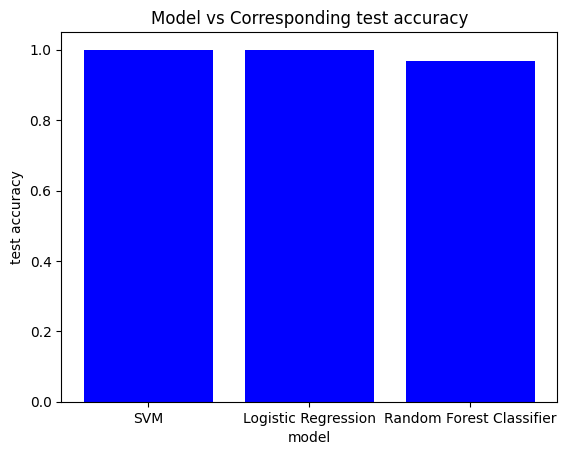

In [33]:
X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])

plt.bar(X, Y, color='b')
plt.title('Model vs Corresponding test accuracy')
plt.xlabel('model')
plt.ylabel('test accuracy')

plt.show()

Currently, the accuracy of first two models, i.e., SVM and Logistic Regression have been obtained the same, whereas the accuracy using Random Forest Classifier algorithm is not higher than rest of two algorithms, so it's better to choose either SVM or LRalgorithm for accurate prediction.